<a href="https://colab.research.google.com/github/Nayoung-young/prj-ecommerce-eda/blob/main/User_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 유저 분석

In [ ]:
# 라이브러리 임포트

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # font

import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib as mpl


In [ ]:
# 한글 폰트 적용

plt.rc('font', family='NanumBarunGothic')

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# _1. 데이터 전처리

## 1.1. 데이터셋 불러오기

In [ ]:
%%time
df_re_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_order_reviews_dataset.csv')

df_customer_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_customers_dataset.csv')
df_ord_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_orders_dataset.csv')
df_it_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_order_items_dataset.csv')

df_prod_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_products_dataset.csv')
df_seller_org = pd.read_csv('/content/drive/MyDrive/dataset_2023/패스트캠퍼스/bootcamp-python-project/olist_sellers_dataset.csv')

CPU times: user 1.4 s, sys: 222 ms, total: 1.63 s
Wall time: 1.77 s


In [ ]:
df_re_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
df_customer_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df_ord_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# df_ord_org[['order_approved_at', 'order_delivered_carrier_date']].isna().sum()

In [ ]:
# df_ord_org[ df_ord_org[['order_approved_at', 'order_delivered_carrier_date']].isna() ]

In [ ]:
df_it_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


## 1.2. 전처리

In [ ]:
# df_ord 전처리

df_ord = df_ord_org.copy()

print('='* 50 +'\n')
print('df_ord\n')
print(f'전처리 전: {df_ord.shape}')

## 1) 필요한 컬럼만 남기기

df_ord = df_ord_org[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']]

## 2) order_status == 'delivered'

df_ord = df_ord[ df_ord['order_status'] == 'delivered' ]

## 3) order_purchase_year, month 추가

df_ord['order_purchase_timestamp'] = pd.to_datetime(df_ord['order_purchase_timestamp'])

df_ord['order_purchase_date'] = df_ord['order_purchase_timestamp'].dt.date
df_ord['order_purchase_year'] = df_ord['order_purchase_timestamp'].dt.year
df_ord['order_purchase_month'] = df_ord['order_purchase_timestamp'].dt.month


# df_ord.drop(columns = ['order_purchase_timestamp'], inplace=True)

## 4) order_purchase_year == 2017 만 포함

df_ord = df_ord[ df_ord['order_purchase_year'] == 2017 ]

print(f'전처리 후: {df_ord.shape}\n')
print('='* 50 +'\n')

print(df_ord.info())


df_ord

전처리 전: (99441, 8)
전처리 후: (43428, 7)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 99438
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  43428 non-null  object        
 1   customer_id               43428 non-null  object        
 2   order_status              43428 non-null  object        
 3   order_purchase_timestamp  43428 non-null  datetime64[ns]
 4   order_purchase_date       43428 non-null  object        
 5   order_purchase_year       43428 non-null  int64         
 6   order_purchase_month      43428 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.7+ MB
None


In [ ]:
df_ord['order_purchase_date'].max()

datetime.date(2017, 12, 31)

In [ ]:
df_ord['order_purchase_date'].max()

datetime.date(2017, 12, 31)

In [ ]:
df_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_purchase_date,order_purchase_year,order_purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017,10
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18,2017,11
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09,2017,7
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16,2017,5
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-23,2017,1


In [ ]:
# df_re 전처리

df_re = df_re_org.copy()

print('='* 50 +'\n')
print('df_re\n')
print(f'전처리 전: {df_re.shape}')

## 1) 필요한 컬럼만 남기기

df_re = df_re_org[['review_id', 'order_id', 'review_score']]

print(f'전처리 후: {df_re.shape}\n')
print('='* 50 +'\n')

print(df_re.info())



df_re

전처리 전: (99224, 7)
전처리 후: (99224, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB
None


In [ ]:
# df_customer 전처리

df_customer = df_customer_org.copy()

print('='* 50 +'\n')
print('df_customer\n')
print(f'전처리 전: {df_customer.shape}')

## 1) 필요한 컬럼만 남기기

df_customer = df_customer_org[['customer_id', 'customer_unique_id', 'customer_state']]

print(f'전처리 후: {df_customer.shape}\n')
print('='* 50 +'\n')

print(df_customer.info())



df_customer

전처리 전: (99441, 5)
전처리 후: (99441, 3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_state      99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB
None


In [ ]:
# df_it 전처리

df_it = df_it_org.copy()

print('='* 50 +'\n')
print('df_it\n')
print(f'전처리 전: {df_it.shape}')

## 1) 필요한 컬럼만 남기기

df_it = df_it_org[['order_id', 'order_item_id', 'product_id', 'seller_id', 'price']]

print(f'전처리 후: {df_it.shape}\n')
print('='* 50 +'\n')

print(df_it.info())



df_it

전처리 전: (112650, 7)
전처리 후: (112650, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.3+ MB
None


#_2. 시각화

## 2.1. 어떤 유저가 2017년에 가장 많이 구매했는가? (VIP 리스트)

> 목적: VIP 유저 리스트 추출하기

* 리스트 출력:
  * customer_unique_id | 2017년 총 상품 구매 금액 | 2017년 첫 상품 구매 | 2017년 마지막 구매 | 2017년 구매 빈도 수

* 시각화:  
  * 구매 금액별 유저 count? (히스토그램)
  * 구매 금액 x 축 / 구매 빈도 수 y 축 : 유저 클러스터링

### 2.1.1 데이터 준비 (merge)
- orders(order_id, order_purchase_year, month, day)  - customers(customer_unique_id) - order_items (price)

In [ ]:
# df_ord.info()

In [ ]:
# df_ord와 df_customer customer_id 기준 inner join

print('='* 50 +'\n')
print(f'merge 전 - df_ord: {df_ord.shape}')
print(f'merge 전 - df_customer: {df_customer.shape}\n')

print('='* 50 +'\n')

df_ord_customer = pd.merge(df_ord, df_customer, on ='customer_id', how ='inner') # 주문 내역이 있는 customer만 남음

print(f'merge 후 - df_ord_customer: {df_ord_customer.shape}\n')

df_ord_customer.info()



merge 전 - df_ord: (43428, 7)
merge 전 - df_customer: (99441, 3)


merge 후 - df_ord_customer: (43428, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 43427
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  43428 non-null  object        
 1   customer_id               43428 non-null  object        
 2   order_status              43428 non-null  object        
 3   order_purchase_timestamp  43428 non-null  datetime64[ns]
 4   order_purchase_date       43428 non-null  object        
 5   order_purchase_year       43428 non-null  int64         
 6   order_purchase_month      43428 non-null  int64         
 7   customer_unique_id        43428 non-null  object        
 8   customer_state            43428 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
# df_ord_customer와 df_it를 order_id 기준 inner join

print('='* 50 +'\n')
print(f'merge 전 - df_ord_customer: {df_ord_customer.shape}')
print(f'merge 전 - df_it: {df_it.shape}\n')

print('='* 50 +'\n')

df_ord_customer_it = pd.merge(df_ord_customer, df_it, on ='order_id', how ='inner')

print(f'merge 후 - df_ord_customer_it: {df_ord_customer_it.shape}\n')

df_ord_customer_it.info()



merge 전 - df_ord_customer: (43428, 9)
merge 전 - df_it: (112650, 5)


merge 후 - df_ord_customer_it: (49556, 13)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49556 entries, 0 to 49555
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  49556 non-null  object        
 1   customer_id               49556 non-null  object        
 2   order_status              49556 non-null  object        
 3   order_purchase_timestamp  49556 non-null  datetime64[ns]
 4   order_purchase_date       49556 non-null  object        
 5   order_purchase_year       49556 non-null  int64         
 6   order_purchase_month      49556 non-null  int64         
 7   customer_unique_id        49556 non-null  object        
 8   customer_state            49556 non-null  object        
 9   order_item_id             49556 non-null  int64         
 10  product_id                495

In [ ]:
df_ord_customer_it[['order_id', 'order_item_id']].nunique()

order_id         43428
order_item_id       21
dtype: int64

In [ ]:
# 필요한 컬럼만 추출하기

df_ord_customer_it = df_ord_customer_it[['order_id', 'customer_unique_id', 'order_item_id', 'price','order_purchase_date', 'order_purchase_year', 'customer_state']]
df_ord_customer_it.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49556 entries, 0 to 49555
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             49556 non-null  object 
 1   customer_unique_id   49556 non-null  object 
 2   order_item_id        49556 non-null  int64  
 3   price                49556 non-null  float64
 4   order_purchase_date  49556 non-null  object 
 5   order_purchase_year  49556 non-null  int64  
 6   customer_state       49556 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.0+ MB


In [ ]:
df_ord_customer_it.head() # 이 상태에서 customer_unique_id 기준으로 집계 예정

,order_id,customer_unique_id,order_item_id,price,order_purchase_date,order_purchase_year,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,1,29.99,2017-10-02,2017,SP
1,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,1,45.00,2017-11-18,2017,RN
2,a4591c265e18cb1dcee52889e2d8acc3,80bb27c7c16e8f973207a5086ab329e2,1,147.90,2017-07-09,2017,PR
3,6514b8ad8028c9f2cc2374ded245783f,932afa1e708222e5821dac9cd5db4cae,1,59.99,2017-05-16,2017,RJ
4,76c6e866289321a7c93b82b54852dc33,39382392765b6dc74812866ee5ee92a7,1,19.90,2017-01-23,2017,RS


### 2.2.2 집계 (df 가공)
* 리스트 출력:
  * customer_unique_id | 2018년 총 상품 구매 금액 | 2018년 첫 상품 구매 | 2018년 마지막 구매 | 2018년 구매 빈도 수

In [ ]:
df_ord_customer_it.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49556 entries, 0 to 49555
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             49556 non-null  object 
 1   customer_unique_id   49556 non-null  object 
 2   order_item_id        49556 non-null  int64  
 3   price                49556 non-null  float64
 4   order_purchase_date  49556 non-null  object 
 5   order_purchase_year  49556 non-null  int64  
 6   customer_state       49556 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.0+ MB


In [ ]:
df_ord_customer_it[ df_ord_customer_it['customer_unique_id'] == '763c8b1c9c68a0229c42c9fc6f662b93' ]

,order_id,customer_unique_id,order_item_id,price,order_purchase_date,order_purchase_year,customer_state


In [ ]:
# 2017년 VIP 고객
%%time
df_vip_2017 = df_ord_customer_it[ df_ord_customer_it['order_purchase_year']  == 2017 ]
df_vip_2017 = df_vip_2017.groupby(['customer_unique_id']).agg(order_purchase_sum_2017 = ('price', 'sum'),
                                                order_purchase_date_min = ('order_purchase_date', 'min'),
                                                order_purchase_date_max = ('order_purchase_date', 'max'),
                                                order_frequency = ('order_id','nunique'),
                                                customer_state = ('customer_state', 'max'))\
                                                .reset_index().sort_values(by='order_purchase_sum_2017', ascending = False)

df_vip_2017.head(20)

CPU times: user 17.7 s, sys: 64.5 ms, total: 17.7 s
Wall time: 34.3 s


,customer_unique_id,order_purchase_sum_2017,order_purchase_date_min,order_purchase_date_max,order_frequency,customer_state
1690,0a0a92112bd4c708ca5fde585afaa872,13440.00,2017-09-29,2017-09-29,1,RJ
35983,da122df9eeddfedc1dc1f5349a1a690c,7388.00,2017-04-01,2017-04-01,2,RJ
36349,dc4802a71eae9be1dd28f5d788ceb526,6735.00,2017-02-12,2017-02-12,1,MS
42003,ff4159b92c40ebe40454e3e6a7c35ed6,6499.00,2017-05-24,2017-05-24,1,SP
10550,4007669dec559734d6f53e029e360987,5934.60,2017-11-24,2017-11-24,1,MG
39335,eebb5dda148d3893cdaf5b5ca3040ccb,4690.00,2017-04-18,2017-04-18,1,SP
181,011875f0176909c5cf0b14a9138bb691,3999.90,2017-03-18,2017-03-18,1,SP
39211,edf81e1f3070b9dac83ec83dacdbb9bc,3999.00,2017-04-18,2017-04-18,1,DF
15632,5e713be0853d8986528d7869a0811d2b,3980.00,2017-02-04,2017-02-04,1,PA
15387,5d09b0d82126457e2a8ebfb9c9a1ffc4,3699.99,2017-02-10,2017-02-10,1,DF


In [ ]:
# 2017년 고객 중 order_frequency > 1

df_vip_2017[df_vip_2017['order_frequency'] > 1].sort_values(by= 'order_purchase_sum_2017', ascending = False).head(10)

,customer_unique_id,order_purchase_sum_2017,order_purchase_date_min,order_purchase_date_max,order_frequency,customer_state
35983,da122df9eeddfedc1dc1f5349a1a690c,7388.00,2017-04-01,2017-04-01,2,RJ
14874,59d66d72939bc9497e19d89c61a96d5f,3459.00,2017-03-02,2017-08-10,2,SP
35564,d77aa95864ae5b42160937615628723a,2400.00,2017-08-29,2017-08-29,2,BA
22200,86df00dc5fd68f4dd5d5945ca19f3ed6,2200.00,2017-06-08,2017-10-13,3,RS
19030,73601b1eec55943e90ce8d61253d5c09,2009.98,2017-09-26,2017-11-01,2,MG
20052,798c34ffa9047399853eab8ca7c0b9a0,1770.30,2017-12-04,2017-12-04,2,MG
34097,cef29e793e232d30250331804cdb7000,1669.12,2017-03-09,2017-05-26,2,MG
26467,a1044dd75b74fbc485b040575a14acf0,1663.00,2017-12-12,2017-12-20,2,SP
31868,c169c9937db997a267f749cdd64c161f,1511.20,2017-05-09,2017-05-09,2,PR
35992,da1e7179b9c5a1494d78528cbcf05aa0,1399.90,2017-05-19,2017-11-09,2,SC


In [ ]:
# 구매 평균 금액
df_vip_2017['average_purchase_price'] = df_vip_2017['order_purchase_sum_2017']/df_vip_2017['order_frequency']

In [ ]:
# 구매 빈도 수 layer
def get_order_frequency_layer(x):
  if x == 1:
    return '1번 구매'
  return '재구매'

df_vip_2017['분류'] = df_vip_2017.apply(lambda x: get_order_frequency_layer(x.order_frequency),
                                                         axis = 'columns')

df_vip_2017.head(10)

,customer_unique_id,order_purchase_sum_2017,order_purchase_date_min,order_purchase_date_max,order_frequency,customer_state,average_purchase_price,분류
1690,0a0a92112bd4c708ca5fde585afaa872,13440.00,2017-09-29,2017-09-29,1,RJ,13440.00,1번 구매
35983,da122df9eeddfedc1dc1f5349a1a690c,7388.00,2017-04-01,2017-04-01,2,RJ,3694.00,재구매
36349,dc4802a71eae9be1dd28f5d788ceb526,6735.00,2017-02-12,2017-02-12,1,MS,6735.00,1번 구매
42003,ff4159b92c40ebe40454e3e6a7c35ed6,6499.00,2017-05-24,2017-05-24,1,SP,6499.00,1번 구매
10550,4007669dec559734d6f53e029e360987,5934.60,2017-11-24,2017-11-24,1,MG,5934.60,1번 구매
39335,eebb5dda148d3893cdaf5b5ca3040ccb,4690.00,2017-04-18,2017-04-18,1,SP,4690.00,1번 구매
181,011875f0176909c5cf0b14a9138bb691,3999.90,2017-03-18,2017-03-18,1,SP,3999.90,1번 구매
39211,edf81e1f3070b9dac83ec83dacdbb9bc,3999.00,2017-04-18,2017-04-18,1,DF,3999.00,1번 구매
15632,5e713be0853d8986528d7869a0811d2b,3980.00,2017-02-04,2017-02-04,1,PA,3980.00,1번 구매
15387,5d09b0d82126457e2a8ebfb9c9a1ffc4,3699.99,2017-02-10,2017-02-10,1,DF,3699.99,1번 구매


In [ ]:
# 구매 금액 구간을 나눈다면?

## 0 이상 500 미만
## 500 이상

def get_purchase_sum_layer(x):

  if x > 0 and x < 500:
    return '0 이상 500 미만'
  # if x >= 2000 and x < 4000:
  #   return '2000 이상 4000 미만'
  return '500 이상'

df_vip_2017['구매 금액대'] = df_vip_2017.apply(lambda x: get_purchase_sum_layer(x.order_purchase_sum_2017),
                                                         axis = 'columns')

df_vip_2017.sample(5)

,customer_unique_id,order_purchase_sum_2017,order_purchase_date_min,order_purchase_date_max,order_frequency,customer_state,average_purchase_price,분류,구매 금액대
22672,89ebb2b6c9f4025084ba5af116d2b5f2,143.00,2017-11-17,2017-11-17,1,PR,143.00,1번 구매,0 이상 500 미만
4858,1d4b025b1f238bb3eb386db7d01660e8,37.90,2017-11-21,2017-11-21,1,SP,37.90,1번 구매,0 이상 500 미만
36404,dca189b14967f95ca5bce343f5cb1323,179.80,2017-06-05,2017-06-05,1,SC,179.80,1번 구매,0 이상 500 미만
39397,ef3b6ab8a1704ead096adbcdee78284b,59.00,2017-12-05,2017-12-05,1,SP,59.00,1번 구매,0 이상 500 미만
281,01a8a2fa13dad647949ff57927e63b0d,42.99,2017-03-30,2017-03-30,1,SP,42.99,1번 구매,0 이상 500 미만


In [ ]:
# df_vip_2017[ df_vip_2017['order_purchase_date_max'] ]

In [ ]:
# df_q01 = df_base.groupby('q01').agg(cnts = ('user_id', 'count')).reset_index()
# df_q01.sort_values(by = 'cnts', ascending = False, inplace = True)

### 2.2.3 [수정 필요] 시각화

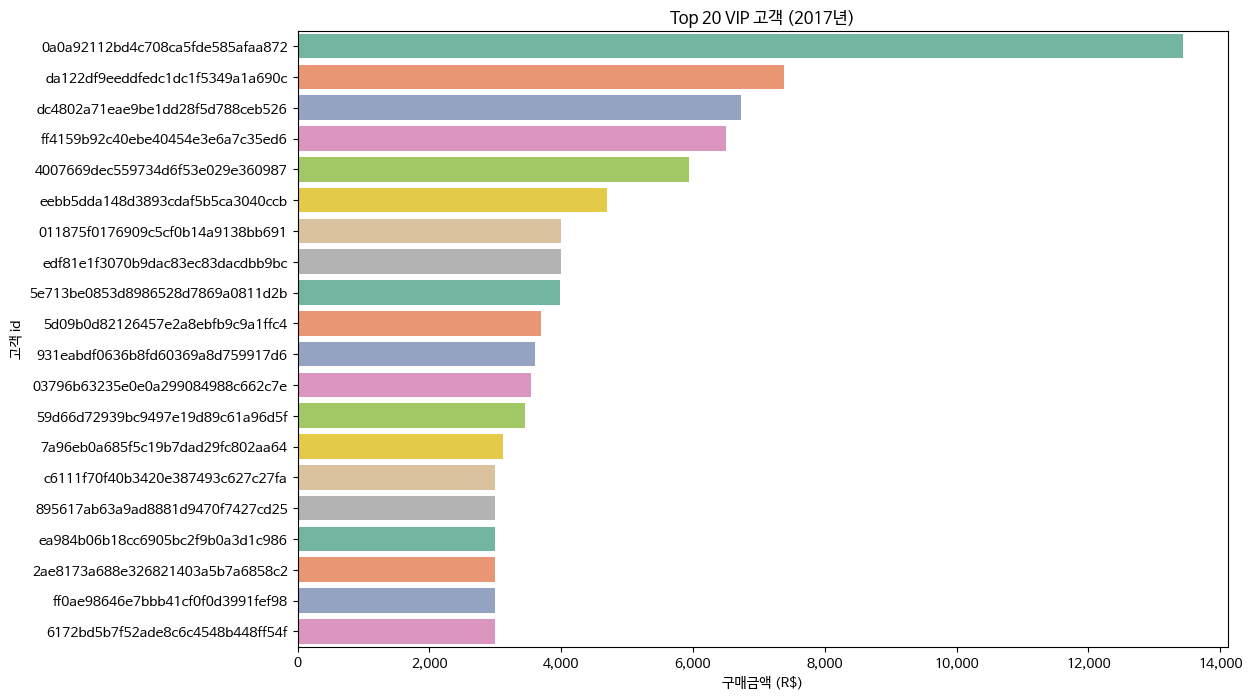

CPU times: user 634 ms, sys: 66.1 ms, total: 701 ms
Wall time: 1.53 s


In [ ]:
# 혹은 상위 10명의 구매 금액 차이?

# customer_id는 .. 그냥 이렇게 두는 게 나을지도? 레포트 보는 사람도 확인해야 하니까

%%time
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8))

sns.barplot(data = df_vip_2017.head(20), y ='customer_unique_id', x = 'order_purchase_sum_2017', palette='Set2')

plt.title('Top 20 VIP 고객 (2017년)') #가제

plt.xlabel('구매금액 (R$)')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p=None: '{:,.0f}'.format(x)))

plt.ylabel('고객 id')

plt.show()


In [ ]:
# 여기에서 지역별로 가거나?





In [ ]:
df_vip_2017['구매 금액대'].value_counts()

0 이상 500 미만    40509
500 이상          1627
Name: 구매 금액대, dtype: int64

In [ ]:
df_vip_2017['분류'].value_counts()

1번 구매    40966
재구매       1170
Name: 분류, dtype: int64

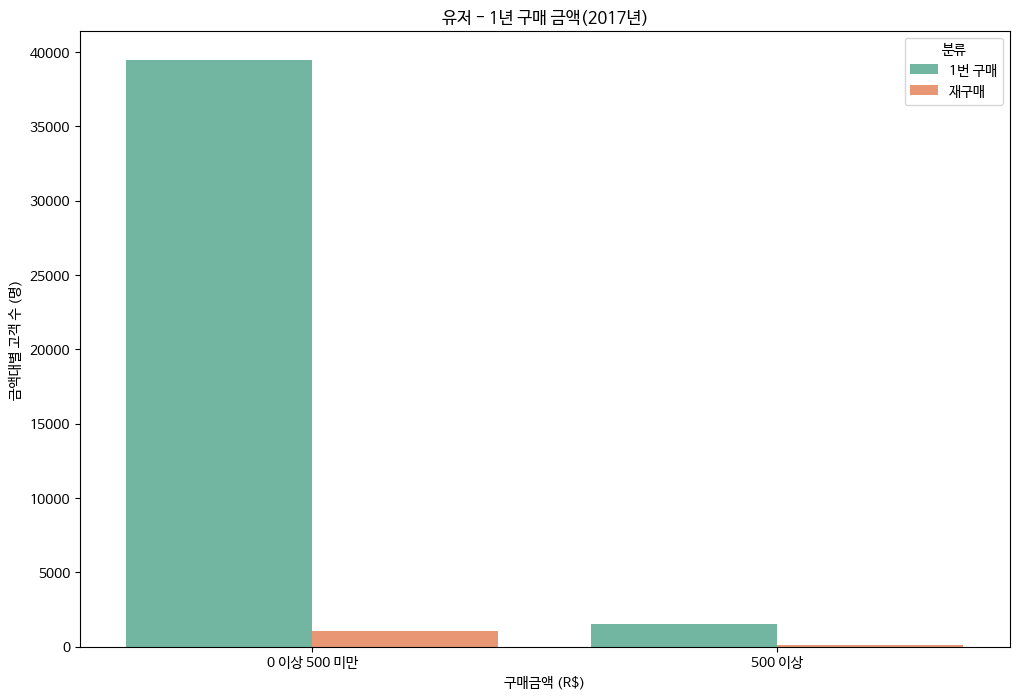

CPU times: user 534 ms, sys: 53.4 ms, total: 588 ms
Wall time: 611 ms


In [ ]:
# 구매 금액 구간을 나눈다면?

## 0 이상 2000 미만
## 2000 이상 4000 미만
## 4000 이상

### -> 너무 안 보여서 0 이상 500 미만, 500 이상으로만 조정

%%time
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8))

sns.countplot(data = df_vip_2017, x ='구매 금액대', palette='Set2',hue = '분류',
              order = df_vip_2017['구매 금액대'].value_counts().index)

plt.title('유저 - 1년 구매 금액(2017년)') #가제

plt.xlabel('구매금액 (R$)')
plt.ylabel('금액대별 고객 수 (명)')

plt.show()

# 1년 동안 500 미만으로 지출한 고객이 대부분
# 구매 빈도 수 또한 1번 구매 = 40966명 / 재구매 = 1170명


### 2.2.4 시각화 (확인용)

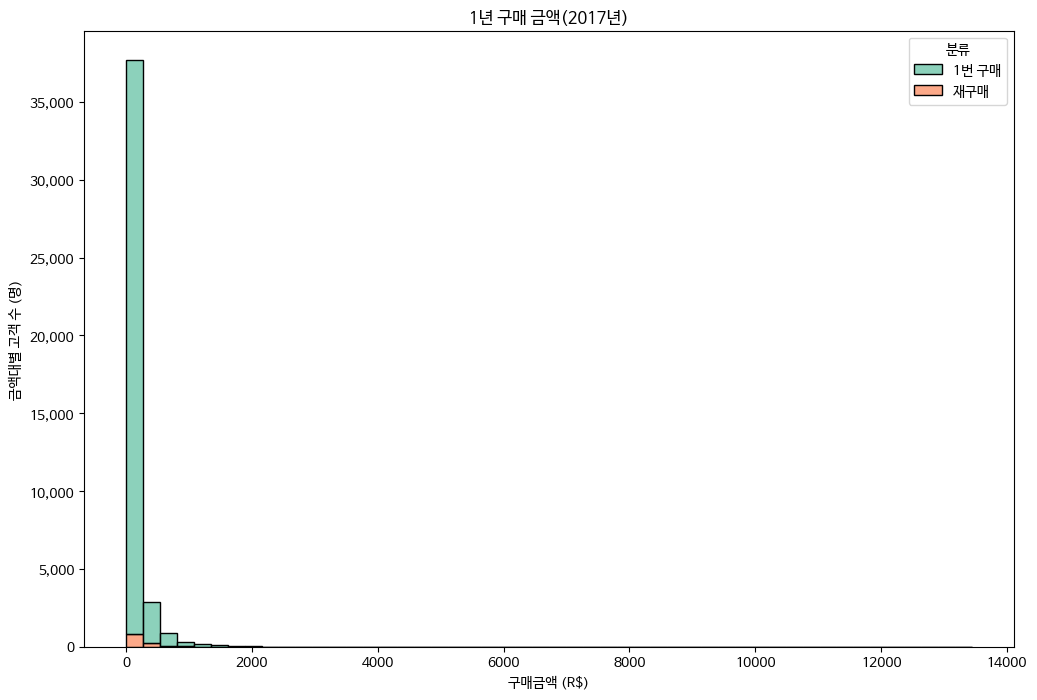

CPU times: user 830 ms, sys: 55.5 ms, total: 886 ms
Wall time: 936 ms


In [ ]:
%%time
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12, 8))


sns.histplot(data = df_vip_2017, x ='order_purchase_sum_2017', bins=50, palette='Set2',
             hue = '분류',
             #hue ='구매 빈도 수',
             multiple="stack")

plt.title('1년 구매 금액(2017년)') #가제

plt.xlabel('구매금액 (R$)')
# plt.xlim(700, 14_000)
# plt.ylim(0, 1000)

plt.ylabel('금액대별 고객 수 (명)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p=None: '{:,.0f}'.format(x)))

plt.show()

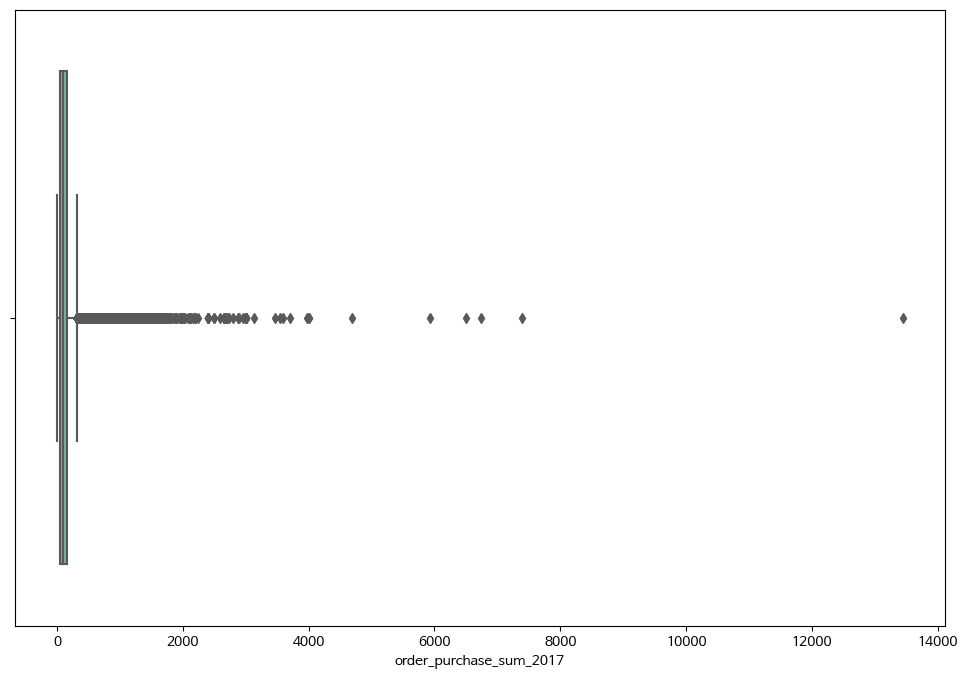

CPU times: user 248 ms, sys: 55.3 ms, total: 303 ms
Wall time: 330 ms


In [ ]:
%%time
plt.figure(figsize = (12, 8))

# sns.histplot(data = df_vip_2017, x ='order_purchase_sum_2017', kde=True)
sns.boxplot(data = df_vip_2017, x ='order_purchase_sum_2017', palette='Set2')

plt.title('')
plt.show()

In [ ]:
# outlier 기준: Q3 + 1.5 IQR

Q3 = df_vip_2017.order_purchase_sum_2017.quantile(q= 0.75) # 154.9
Q1 = df_vip_2017.order_purchase_sum_2017.quantile(q= 0.25) # 47.98
IQR = Q3-Q1

outlier_border = Q3 + 1.5 * IQR

print(f'기존 dataset shape: {df_vip_2017.shape}')
outliers = df_vip_2017[ df_vip_2017['order_purchase_sum_2017'] >= outlier_border ]

print(f'아웃라이어에 해당하는 데이터 shape: {outliers.shape}, 전체의 {round(outliers.shape[0]/df_vip_2017.shape[0]*100, 2)}%')


기존 dataset shape: (42136, 9)
아웃라이어에 해당하는 데이터 shape: (3501, 9), 전체의 8.31%


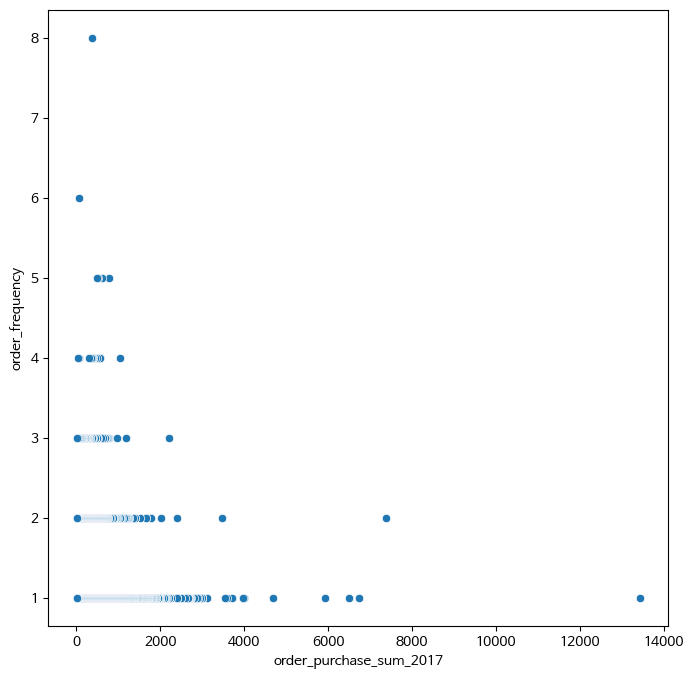

CPU times: user 447 ms, sys: 48.5 ms, total: 495 ms
Wall time: 539 ms


In [ ]:
%%time
plt.figure(figsize = (8, 8))

sns.scatterplot(data = df_vip_2017, x ='order_purchase_sum_2017', y ='order_frequency') #hue = 'customer_state')
# sns.scatterplot(data = df_vip_2017, x ='order_purchase_sum_2017', y ='average_purchase_price') #hue = 'customer_state')

# 이 상태로는 클러스터링 어려움 (order_frequency가 정수형이라서)
## order_frequency = 1 인 경우가 가장 많음

plt.title('')
plt.show()

## 2.2. [진행중] 구입금액 top 100 유저 분석

### 2.2.1. 데이터 준비 (슬라이싱)

In [ ]:
vip_100 = df_vip_2017.head(100)
vip_100.head(5)

,customer_unique_id,order_purchase_sum_2017,order_purchase_date_min,order_purchase_date_max,order_frequency,customer_state,average_purchase_price,분류,구매 금액대
1690,0a0a92112bd4c708ca5fde585afaa872,13440.0,2017-09-29,2017-09-29,1,RJ,13440.0,1번 구매,500 이상
35983,da122df9eeddfedc1dc1f5349a1a690c,7388.0,2017-04-01,2017-04-01,2,RJ,3694.0,재구매,500 이상
36349,dc4802a71eae9be1dd28f5d788ceb526,6735.0,2017-02-12,2017-02-12,1,MS,6735.0,1번 구매,500 이상
42003,ff4159b92c40ebe40454e3e6a7c35ed6,6499.0,2017-05-24,2017-05-24,1,SP,6499.0,1번 구매,500 이상
10550,4007669dec559734d6f53e029e360987,5934.6,2017-11-24,2017-11-24,1,MG,5934.6,1번 구매,500 이상


### 2.2.2. 시각화

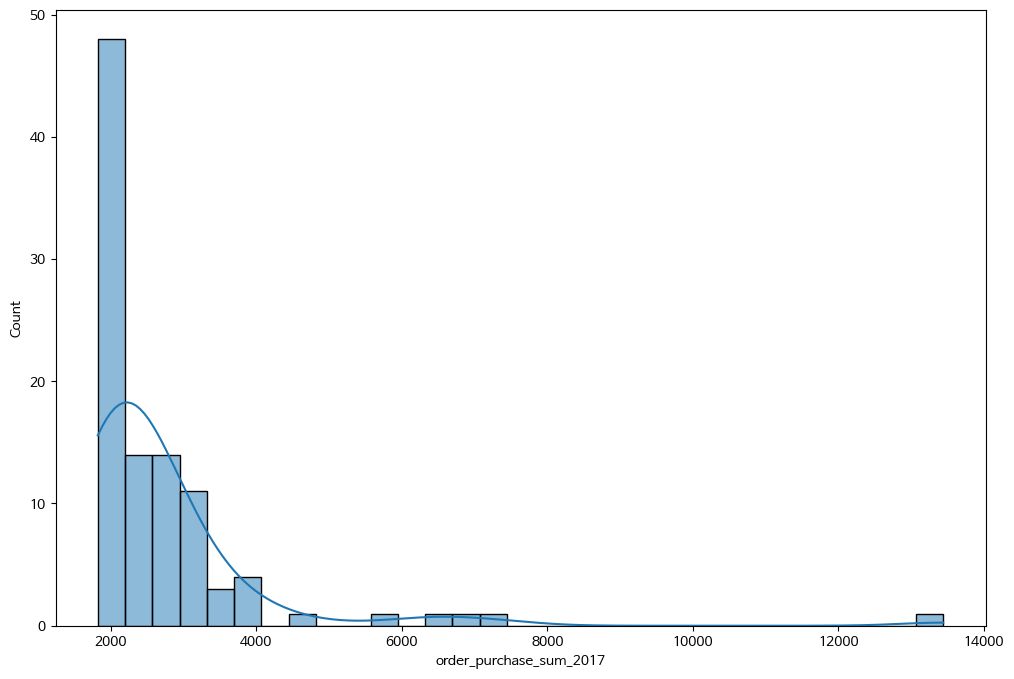

CPU times: user 406 ms, sys: 90.9 ms, total: 497 ms
Wall time: 532 ms


In [ ]:
%%time
# (확인용) 상위 100명 고객만 2017년 구입금액 histplot

plt.figure(figsize = (12, 8))

sns.histplot(data = vip_100, x ='order_purchase_sum_2017', kde=True)
# sns.boxplot(data = vip_100, x ='order_purchase_sum_2017', palette='Set2')

# plt.xlim(1900, 4200)

plt.show()

In [ ]:
%%time
# 상위 100명 유저 state 별 집계

# vip_100_state = vip_100.groupby(['customer_state']).agg(top100_customer_cnt = ('customer_unique_id', 'count'))\
# .reset_index().sort_values(by='top100_customer_cnt', ascending = False)

# vip_100_state

vip_100.customer_state.value_counts()

CPU times: user 1.07 ms, sys: 0 ns, total: 1.07 ms
Wall time: 1.08 ms


SP    33
RJ    14
MG    10
RS     7
BA     7
SC     5
PR     4
PE     4
DF     3
MS     2
GO     2
PB     2
PA     1
CE     1
TO     1
RO     1
MT     1
MA     1
AL     1
Name: customer_state, dtype: int64

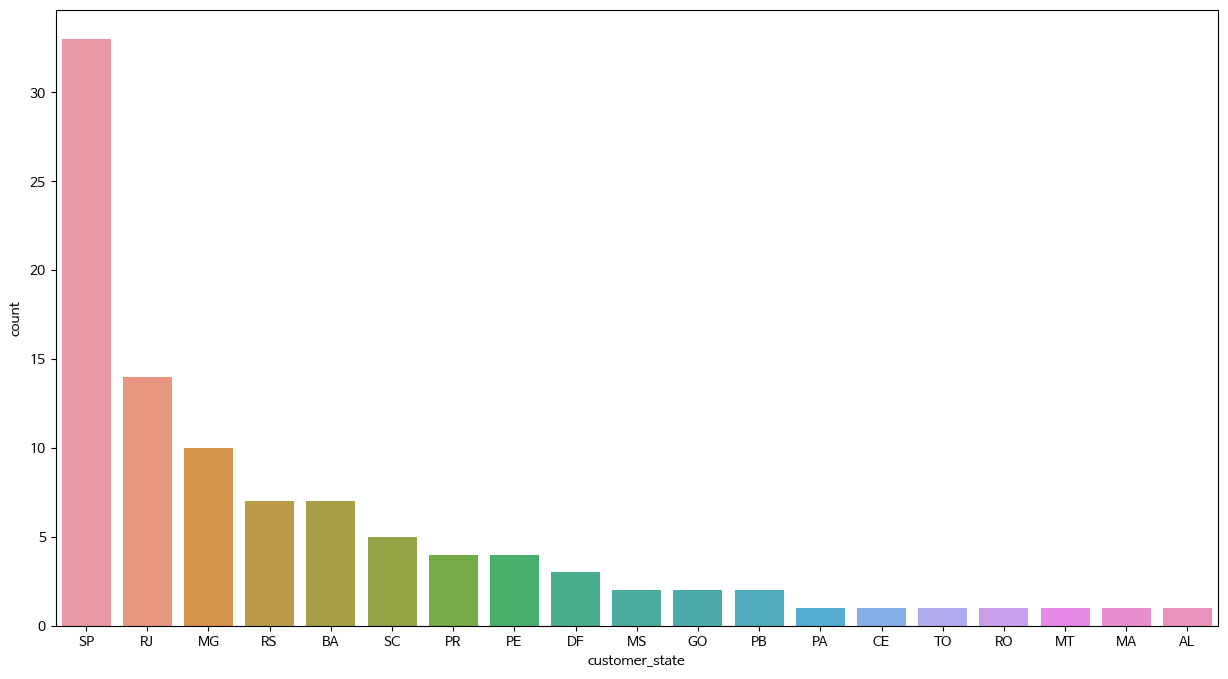

CPU times: user 410 ms, sys: 89.5 ms, total: 499 ms
Wall time: 489 ms


In [ ]:
%%time
# 상위 100명 유저 state 별 집계

## 역시 SP에 VIP 유저가 쏠려 있음
## 지도로 표시할 수 있으면 좋을 것 같은데

plt.figure(figsize = (15,8))

sns.countplot(data = vip_100, x ='customer_state', order = vip_100.customer_state.value_counts().index)
# 버블 차트??? <- 찾아보기

plt.show()

## 2.3. [진행중] 재구매가 '언제' 발생했는가?

- 1번 구매 고객 vs 재구매 고객
  - 재구매가 '언제' 발생했는가? x축: 월, y축: order count <- 코호트 분석으로 가능할지도? (구매 리텐션)
  - 재구매가 '어떤 카테고리'에서 발생했는가? x축: 카테고리, y축: order count

In [ ]:
# order_frequency에 따라 고객 분류

df_customers_new = df_vip_2017[ df_vip_2017['분류'] != '재구매' ]
print(f'1번 구매한 고객 : df_customers_new, {df_customers_new.shape}')

df_customers_repurchase = df_vip_2017[ df_vip_2017['분류'] == '재구매' ]
print(f'2번 이상 구매한 고객 : df_customers_repurchase, {df_customers_repurchase.shape}')


1번 구매한 고객 : df_customers_new, (40966, 9)
2번 이상 구매한 고객 : df_customers_repurchase, (1170, 9)


In [ ]:
print(df_customers_repurchase.customer_unique_id.tolist())

['da122df9eeddfedc1dc1f5349a1a690c', '59d66d72939bc9497e19d89c61a96d5f', 'd77aa95864ae5b42160937615628723a', '86df00dc5fd68f4dd5d5945ca19f3ed6', '73601b1eec55943e90ce8d61253d5c09', '798c34ffa9047399853eab8ca7c0b9a0', 'cef29e793e232d30250331804cdb7000', 'a1044dd75b74fbc485b040575a14acf0', 'c169c9937db997a267f749cdd64c161f', 'da1e7179b9c5a1494d78528cbcf05aa0', 'eaa604ab9f816252edb7a8d297f932e5', 'f0daba1cfcc18d5a3229e1a911313e3e', 'ecdbc4bf2201c807294c7d8c4b777032', '0f5ac8d5c31de21d2f25e24be15bbffb', '12ab9334b1240d6d037f2b0102a49571', '1da09dd64e235e7c2f29a4faff33535c', 'ca6d9bc2e717c2a0aa19d77a3bfa5398', 'cbd08b04b3f301152b7570da5e9c8cc4', 'b045295488236fa73d8d9c37dc4b03e7', '4e1cce07cd5937c69dacac3c8b13d965', '21bde4e982c4681021edabb899bcebfe', 'd5419994a02a55d4b7cd00e77fabdbae', '0aadc1d26d1c8b88a52c39a533ccea93', 'd2ecc28fac1b377eefe7b209a895626a', 'f34cd7fd85a1f8baff886edf09567be3', '8bb910cd8c3b29e4acf2e94e3aaffbbf', '81865792a5df52436b4e759b4ba21412', '2fe074ea3cc24b8fd57d29effc

### 2.3.1. 데이터 준비 (코호트)

In [ ]:
# 코호트 분석을 하기 위한 준비
df_ord_customer_it.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49556 entries, 0 to 49555
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             49556 non-null  object 
 1   customer_unique_id   49556 non-null  object 
 2   order_item_id        49556 non-null  int64  
 3   price                49556 non-null  float64
 4   order_purchase_date  49556 non-null  object 
 5   order_purchase_year  49556 non-null  int64  
 6   customer_state       49556 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.0+ MB


In [ ]:
df_ord_customer_it.order_id.value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
73c8ab38f07dc94389065f7eba4f297a    14
                                    ..
e8114ebb6eae4aff63282fef68ad6a4c     1
ee9f3d0f79a91c7ea3153483af83ac3d     1
37ddd5dd20d5259555dc5c1801039b7d     1
8a2914855b65c59992d45f1b611388ea     1
83c1379a015df1e13d02aae0204711ab     1
Name: order_id, Length: 43428, dtype: int64

In [ ]:
# df_cohort

df_cohort = df_ord_customer_it.groupby(['customer_unique_id', 'order_id']).agg(order_date =('order_purchase_date', 'max')).reset_index()
# df_cohort = df_ord_customer_it.groupby(['customer_unique_id', 'order_id'])['customer_unique_id', 'order_id', 'order_purchase_date']
df_cohort = df_cohort.sort_values(by='customer_unique_id')
df_cohort.head()

,customer_unique_id,order_id,order_date
0,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10
1,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12
2,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14
3,0005e1862207bf6ccc02e4228effd9a0,ae76bef74b97bcb0b3e355e60d9a6f9c,2017-03-04
4,0006fdc98a402fceb4eb0ee528f6a8d4,6681163e3dab91c549952b2845b20281,2017-07-18


In [ ]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 43427
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  43428 non-null  object
 1   order_id            43428 non-null  object
 2   order_date          43428 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [ ]:
# 검증 - 재구매 고객의 경우 행 여러 개 나오는 것 확인

# order_date가 같게 나오는데, 확인해보니 이 사람은 하루에 두 번 구매 함

df_cohort[ df_cohort['customer_unique_id'] == '70ffda7e4167ce87ac620ab2c572ac4f']

,customer_unique_id,order_id,order_date
19164,70ffda7e4167ce87ac620ab2c572ac4f,823384842bb58973b0c88e31c6f94da9,2017-09-22
19165,70ffda7e4167ce87ac620ab2c572ac4f,95e7f49dc56e12097c265c45527a3941,2017-09-22


In [ ]:
# df_ord_customer_it
df_ord_customer_it[ df_ord_customer_it['customer_unique_id'] == '70ffda7e4167ce87ac620ab2c572ac4f']

,order_id,customer_unique_id,order_item_id,price,order_purchase_date,order_purchase_year,customer_state
38710,95e7f49dc56e12097c265c45527a3941,70ffda7e4167ce87ac620ab2c572ac4f,1,37.99,2017-09-22,2017,SP
40586,823384842bb58973b0c88e31c6f94da9,70ffda7e4167ce87ac620ab2c572ac4f,1,18.74,2017-09-22,2017,SP
40587,823384842bb58973b0c88e31c6f94da9,70ffda7e4167ce87ac620ab2c572ac4f,2,18.74,2017-09-22,2017,SP


### 2.3.2 컬럼 추가 (코호트)

- 최초 구매일:
- 월 단위 형태로 data 맟추기:  

In [ ]:
# 최초 구매일

df_cohort['first_order'] = df_cohort.groupby(['customer_unique_id'])['order_date'].transform('min')
df_cohort.head()


,customer_unique_id,order_id,order_date,first_order
0,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10,2017-03-10
1,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12,2017-10-12
2,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14,2017-11-14
3,0005e1862207bf6ccc02e4228effd9a0,ae76bef74b97bcb0b3e355e60d9a6f9c,2017-03-04,2017-03-04
4,0006fdc98a402fceb4eb0ee528f6a8d4,6681163e3dab91c549952b2845b20281,2017-07-18,2017-07-18


In [ ]:
df_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 43427
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  43428 non-null  object
 1   order_id            43428 non-null  object
 2   order_date          43428 non-null  object
 3   first_order         43428 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [ ]:
# 월 단위 형태로 data 맟추기

df_cohort['first_order'] = pd.to_datetime(df_cohort['first_order'])
df_cohort['first_ym'] = df_cohort['first_order'].dt.strftime('%Y-%m')


df_cohort['order_date'] = pd.to_datetime(df_cohort['order_date'])
df_cohort['order_ym'] = df_cohort['order_date'].dt.strftime('%Y-%m')
df_cohort.head()


,customer_unique_id,order_id,order_date,first_order,first_ym,order_ym
0,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10,2017-03-10,2017-03,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12,2017-10-12,2017-10,2017-10
2,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14,2017-11-14,2017-11,2017-11
3,0005e1862207bf6ccc02e4228effd9a0,ae76bef74b97bcb0b3e355e60d9a6f9c,2017-03-04,2017-03-04,2017-03,2017-03
4,0006fdc98a402fceb4eb0ee528f6a8d4,6681163e3dab91c549952b2845b20281,2017-07-18,2017-07-18,2017-07,2017-07


In [ ]:
# 검증 - data range 확인

df_cohort['first_ym'].nunique()

12

In [ ]:
# 검증 - data range 확인

print(df_cohort['order_ym'].min())
print(df_cohort['order_ym'].max())


2017-01
2017-12


### 2.3.3. 집계 (코호트)

In [ ]:
# df_user_cnts = df_base.groupby(['first_ym', 'paid_ym'])['user_key'].agg('nunique').reset_index()
# df_user_cnts = df_user_cnts.rename(columns = {'user_key':'user_cnts'})
# df_user_cnts

In [ ]:
df_cohort_cnts = df_cohort.groupby(['first_ym', 'order_ym'])['customer_unique_id'].agg('nunique').reset_index()
df_cohort_cnts = df_cohort_cnts.rename(columns = {'customer_unique_id':'user_cnts'})
df_cohort_cnts

,first_ym,order_ym,user_cnts
0,2017-01,2017-01,718
1,2017-01,2017-02,2
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
...,...,...,...
72,2017-10,2017-11,31
73,2017-10,2017-12,11
74,2017-11,2017-11,7061
75,2017-11,2017-12,40


In [ ]:
# 매월 데이터 있는지 확인

df_cohort_cnts['first_ym'].value_counts()


2017-01    11
2017-02    11
2017-03    10
2017-04     9
2017-05     8
2017-06     7
2017-07     6
2017-08     5
2017-09     4
2017-10     3
2017-11     2
2017-12     1
Name: first_ym, dtype: int64

In [ ]:
# 어디가 빠졌나 확인
# 2017년 1월에 첫 구매한 사람 중 2017-10월에 재구매한 사람이 없었음 -> 행 만들어서 추가해주기!

df_cohort_cnts[ df_cohort_cnts['first_ym'] == '2017-01' ]

,first_ym,order_ym,user_cnts
0,2017-01,2017-01,718
1,2017-01,2017-02,2
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
5,2017-01,2017-06,1
6,2017-01,2017-07,3
7,2017-01,2017-08,1
8,2017-01,2017-09,1
9,2017-01,2017-11,3


In [ ]:
df_cohort_cnts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   first_ym   77 non-null     object
 1   order_ym   77 non-null     object
 2   user_cnts  77 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [ ]:
# 빠져있는 데이터 추가
df_cohort_cnts.loc[ df_cohort_cnts.shape[0] ] = [ '2017-01', '2017-10', 0 ]
df_cohort_cnts = df_cohort_cnts.sort_values(by = ['first_ym', 'order_ym'], ascending = True)

In [ ]:
df_cohort_cnts[ df_cohort_cnts['first_ym'] == '2017-01' ]

,first_ym,order_ym,user_cnts
0,2017-01,2017-01,718
1,2017-01,2017-02,2
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
5,2017-01,2017-06,1
6,2017-01,2017-07,3
7,2017-01,2017-08,1
8,2017-01,2017-09,1
77,2017-01,2017-10,0


In [ ]:
df_cohort_cnts['first_ym'].value_counts()

2017-01    12
2017-02    11
2017-03    10
2017-04     9
2017-05     8
2017-06     7
2017-07     6
2017-08     5
2017-09     4
2017-10     3
2017-11     2
2017-12     1
Name: first_ym, dtype: int64

In [ ]:
# 검증 ??



### 2.3.4 형태 만들기 (코호트)

In [ ]:
# Cohort 기간 컬럼 생성

df_cohort_cnts['cohort_period'] = df_cohort_cnts.groupby(['first_ym']).cumcount()
df_cohort_cnts.head()


,first_ym,order_ym,user_cnts,cohort_period
0,2017-01,2017-01,718,0
1,2017-01,2017-02,2,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4


In [ ]:
df_cohort_cnts.set_index(['first_ym', 'cohort_period'])

order_ym  user_cnts
first_ym cohort_period                    
2017-01  0              2017-01        718
         1              2017-02          2
         2              2017-03          2
         3              2017-04          1
         4              2017-05          3
...                         ...        ...
2017-10  1              2017-11         31
         2              2017-12         11
2017-11  0              2017-11       7061
         1              2017-12         40
2017-12  0              2017-12       5338

[78 rows x 2 columns]

In [ ]:

# 값을 기준으로 unstack

user_cohort = df_cohort_cnts.set_index(['first_ym', 'cohort_period'])['user_cnts'].unstack()
# user_cohort = df_cohort_cnts.set_index(['first_ym', 'paid_ym'])['user_cnts'].unstack()
user_cohort

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11
first_ym,,,,,,,,,,,,
2017-01,718.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,0.0,3.0,1.0
2017-02,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,NaN
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,NaN,NaN
2017-04,2257.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,NaN,NaN,NaN
2017-05,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,NaN,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07,3753.0,20.0,13.0,9.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4057.0,28.0,14.0,11.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4005.0,28.0,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.3.5. 리텐션 결과 산출 (코호트)

In [ ]:
user_cohort[0]

first_ym
2017-01     718.0
2017-02    1628.0
2017-03    2503.0
2017-04    2257.0
2017-05    3451.0
2017-06    3037.0
2017-07    3753.0
2017-08    4057.0
2017-09    4005.0
2017-10    4328.0
2017-11    7061.0
2017-12    5338.0
Name: 0, dtype: float64

In [ ]:
user_retention = user_cohort.divide(user_cohort[0], axis = 0)
user_retention

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11
first_ym,,,,,,,,,,,,
2017-01,1.0,0.002786,0.002786,0.001393,0.004178,0.001393,0.004178,0.001393,0.001393,0.000000,0.004178,0.001393
2017-02,1.0,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229,NaN
2017-03,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,NaN,NaN
2017-04,1.0,0.006203,0.002215,0.001772,0.002658,0.002658,0.003545,0.003101,0.003101,NaN,NaN,NaN
2017-05,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,NaN,NaN,NaN,NaN
2017-06,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005329,0.003464,0.002398,0.002931,0.002132,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006902,0.003451,0.002711,0.003451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006991,0.005493,0.002747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.3.3. 코호트 시각화

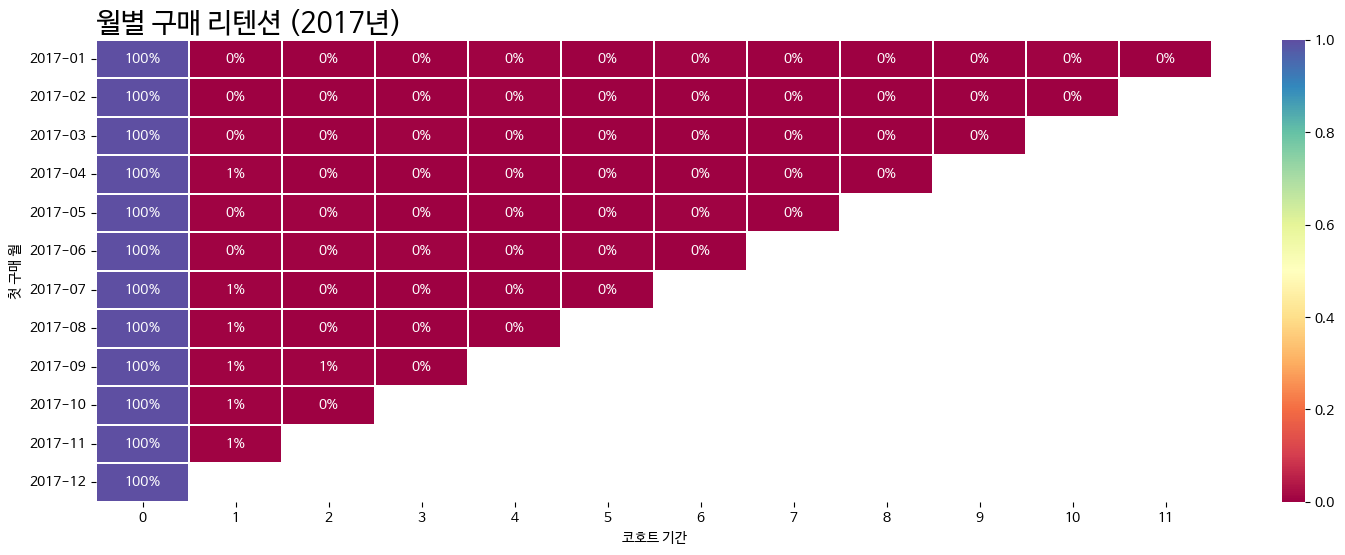

CPU times: user 829 ms, sys: 51.1 ms, total: 880 ms
Wall time: 2.54 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

sns.heatmap(
    data = user_retention,
    annot = True,
    fmt = '.0%',
    linecolor = 'white',
    linewidth = 0.1,
    cmap = 'Spectral'
)

plt.title('월별 구매 리텐션 (2017년)', fontsize = 20, loc = 'left')

plt.xlabel('코호트 기간')
plt.ylabel('첫 구매 월')

plt.show()

### 2.3.4 [진행중] 시계열 시각화

- 어차피 1번 구매 vs 재구매 고객 비교하면 잘 안 보이므로 재구매 고객만 모아서 언제 재구매 발생했는지 시계열 그래프로 찍자
- x축: 월, y축: 주문 건수

In [ ]:
# order_frequency에 따라 고객 분류

df_customers_new = df_vip_2017[ df_vip_2017['분류'] != '재구매' ]
print(f'1번 구매한 고객 : df_customers_new, {df_customers_new.shape}')

df_customers_repurchase = df_vip_2017[ df_vip_2017['분류'] == '재구매' ]
print(f'2번 이상 구매한 고객 : df_customers_repurchase, {df_customers_repurchase.shape}')


1번 구매한 고객 : df_customers_new, (40966, 9)
2번 이상 구매한 고객 : df_customers_repurchase, (1170, 9)


In [ ]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43428 entries, 0 to 99438
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  43428 non-null  object        
 1   customer_id               43428 non-null  object        
 2   order_status              43428 non-null  object        
 3   order_purchase_timestamp  43428 non-null  datetime64[ns]
 4   order_purchase_date       43428 non-null  object        
 5   order_purchase_year       43428 non-null  int64         
 6   order_purchase_month      43428 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.7+ MB


In [ ]:
%%time
df_repurchase = df_ord_customer_it.groupby(['customer_unique_id', 'order_id'])\
                .agg(order_date =('order_purchase_date', 'max'))\
                .reset_index()

# 재구매 고객 id만 가져오기
df_customers_repurchase_ids = df_customers_repurchase['customer_unique_id']

# inner join 해서 재구매 고객의 주문 내역만 남기기
## df_repurchase와 df_customers_repurchase_ids customer_id 기준 inner join

print('='* 50 +'\n')
print(f'merge 전 - df_repurchase: {df_repurchase.shape}')
print(f'merge 전 - df_customers_repurchase_ids: {df_customers_repurchase_ids.shape}\n')

print('='* 50 +'\n')

df_repurchase = pd.merge(df_repurchase, df_customers_repurchase_ids, on = 'customer_unique_id', how='inner')

print(f'merge 후 - df_repurchase : {df_repurchase.shape}\n')

df_repurchase.info()



merge 전 - df_repurchase: (43428, 3)
merge 전 - df_customers_repurchase_ids: (1170,)


merge 후 - df_repurchase : (2462, 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 0 to 2461
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  2462 non-null   object
 1   order_id            2462 non-null   object
 2   order_date          2462 non-null   object
dtypes: object(3)
memory usage: 76.9+ KB
CPU times: user 4.86 s, sys: 31.9 ms, total: 4.89 s
Wall time: 6.91 s


In [ ]:
# 검증 - 재구매 고객 unique count
df_repurchase.customer_unique_id.nunique()

1170

In [ ]:
# order_month 추가

df_repurchase['order_date'] = pd.to_datetime(df_repurchase['order_date'])
df_repurchase['order_month'] = df_repurchase['order_date'].dt.month

df_repurchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 0 to 2461
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  2462 non-null   object        
 1   order_id            2462 non-null   object        
 2   order_date          2462 non-null   datetime64[ns]
 3   order_month         2462 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 96.2+ KB


In [ ]:
df_repurchase.sort_values(by = 'customer_unique_id')

,customer_unique_id,order_id,order_date,order_month
0,00cc12a6d8b578b8ebd21ea4e2ae8b27,64307ceb91666760cf3ff463618302fd,2017-03-21,3
1,00cc12a6d8b578b8ebd21ea4e2ae8b27,d61b915b69851aec8a8865f36cfd793e,2017-03-21,3
2,013f4353d26bb05dc6652f1269458d8d,9eead354475b8b8fde3811f26b2599fc,2017-11-28,11
3,013f4353d26bb05dc6652f1269458d8d,ddc5df3b1c497720bae1692c170baec0,2017-11-24,11
4,015557c9912277312b9073947804a7ba,482c052df6392e43296eba90754938fc,2017-03-23,3
...,...,...,...,...
2458,ff922bdd6bafcdf99cb90d7f39cea5b3,6be1646fccbb69d34b22da3b1807d51d,2017-09-14,9
2457,ff922bdd6bafcdf99cb90d7f39cea5b3,5f79e2da24a52e76bc22897df03a7901,2017-08-23,8
2459,ff922bdd6bafcdf99cb90d7f39cea5b3,fd216c435fda2be27c92920a5e5dba82,2017-02-22,2
2460,ffe254cc039740e17dd15a5305035928,39a0e2f723def2e12a51e963006c9242,2017-04-02,4


In [ ]:
# 첫구매 행은 제외!!!  - 다시 해보기

df_repurchase['first_order_month'] = df_repurchase.groupby(['customer_unique_id'])['order_month'].transform('min')
df_repurchase.head()

df_repurchase = df_repurchase[ df_repurchase['order_month'] != df_repurchase['first_order_month'] ]
df_repurchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 5 to 2458
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  627 non-null    object        
 1   order_id            627 non-null    object        
 2   order_date          627 non-null    datetime64[ns]
 3   order_month         627 non-null    int64         
 4   first_order_month   627 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 29.4+ KB


In [ ]:

df_repurchase['first_order_month'] = df_repurchase.groupby(['customer_unique_id'])['order_month'].transform('min')
df_repurchase.head()

df_repurchase = df_repurchase[ df_repurchase['order_month'] != df_repurchase['first_order_month'] ]
df_repurchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 387 to 2458
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  40 non-null     object        
 1   order_id            40 non-null     object        
 2   order_date          40 non-null     datetime64[ns]
 3   order_month         40 non-null     int64         
 4   first_order_month   40 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.9+ KB


<ipython-input-79-c047f961ffd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repurchase['first_order_month'] = df_repurchase.groupby(['customer_unique_id'])['order_month'].transform('min')


In [ ]:
# 집계

df_repurchase_month = df_repurchase.groupby(['order_month'])['order_id'].count().reset_index()
df_repurchase_month.rename(columns = {'order_id' :'order_cnts'}, inplace = True )

df_repurchase_month

,order_month,order_cnts
0,6,1
1,7,1
2,8,5
3,9,5
4,10,10
5,11,14
6,12,4


import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8370801340737466157, *['order_month'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8370801340737466157, *['order_cnts'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8370801340737466157, *['order_month'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8370801340737466157, *['order_cnts'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8370801340737466157, *[[['order_month', 'order_cnts']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8370801340737466157, *['order_month', 'order_cnts', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8370801340737466157, *['order_month', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8370801340737466157, *['order_month'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8370801340737466157, *['order_cnts'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8370801340737466157, *['order_month'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8370801340737466157, *['order_cnts'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8370801340737466157, *[[['order_month', 'order_cnts']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8370801340737466157, *['order_month', 'order_cnts', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8370801340737466157 = autoviz.get_df('df_8370801340737466157')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8370801340737466157, *['order_month', 'count()', None], **{})
chart

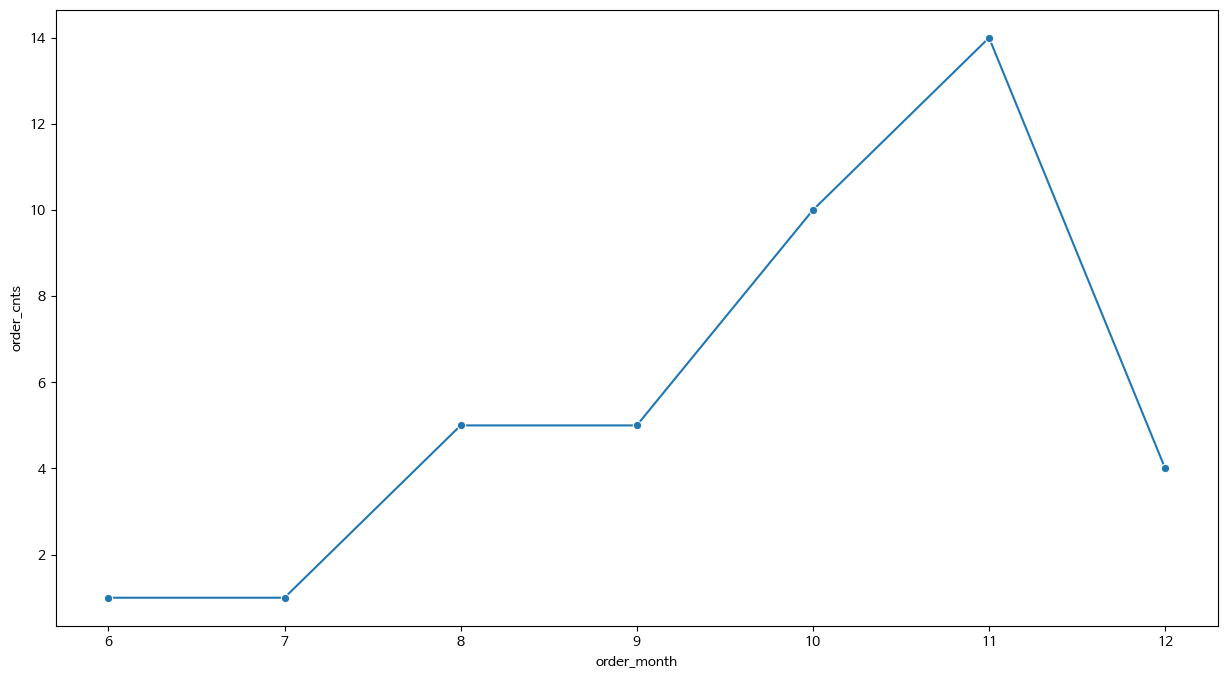

In [ ]:
# 월별 재구매 발생 횟수 <- user 카운트로 봐야 하나?

## subplot 2개로 붙여서 하기!

# 보고자 하는 것: '언제' 재구매를 했나?

## 근데 여기서 첫구매 행은 제외하기!

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (15, 8))

sns.lineplot(df_repurchase_month, x = 'order_month', y = 'order_cnts', marker ='o')
# 첫구매 발생 건수도 line 추가해서

plt.show()


### 2.3.4 시각화 (확인용)  

In [ ]:
# 구매 빈도 수 value_counts
df_vip_2017.order_frequency.value_counts()

1    40966
2     1077
3       74
4       13
5        4
8        1
6        1
Name: order_frequency, dtype: int64

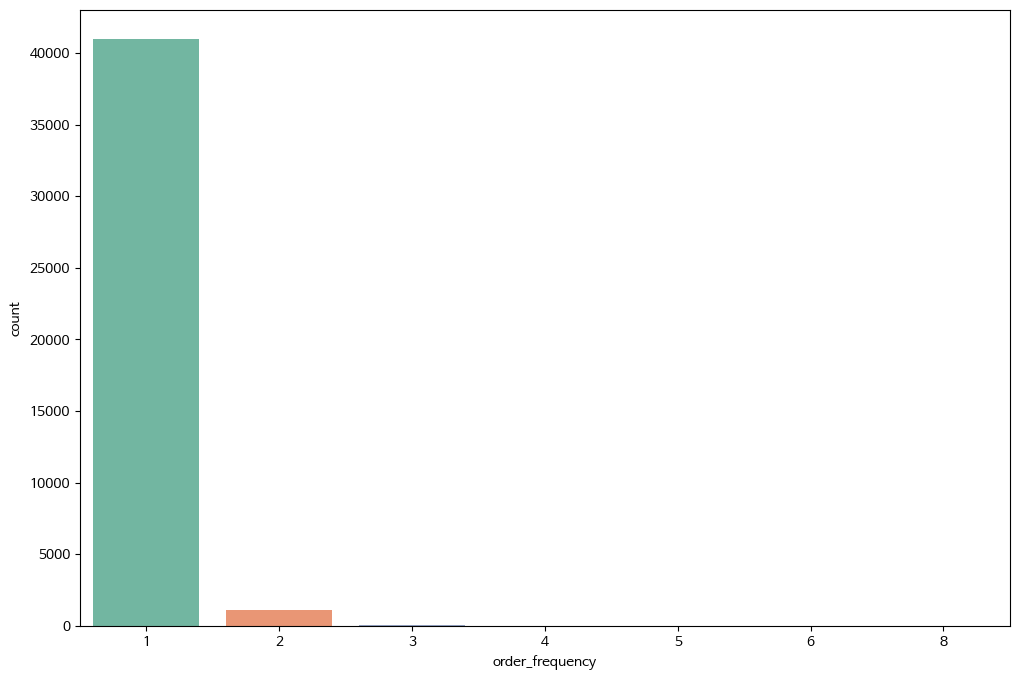

In [ ]:
# 구매 빈도 수 barplot (확인용)

plt.figure(figsize = (12, 8))

sns.countplot(data = df_vip_2017, x ='order_frequency', palette = 'Set2')
plt.show()

In [ ]:
## 2번 이상 구매한 고객은 어떤 카테고리를 구매한 걸까? 그 구매 카테고리 간 공통점이 있을까?

# 가설: 2번 이상 구매한 고객은 소모품을 구매했을 것이다

customer_repurchase_ids = df_customers_repurchase.customer_unique_id.tolist()

# df_ord_customer_it, df_prod 와 join 필요

## 2.4 재구매가 '어떤 카테고리'에서 발생했는가?
- - 1번 구매 고객 vs 재구매 고객

## 2.4. 세그멘테이션

# _3. 결론